# COGS 108 - Factors Influencing Course and Instructor Recommendation Rates at UCSD.   

Link to video: https://youtu.be/BbZiLtoUCuA

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

This project aims to investigate how various factors influence the rate at which courses and instructors are recommended at UCSD. To address this question, we gathered and organized data from UCSD's CAPEs using web scraping, then we processed, create visual representations, split data into STEM/non-STEM categories and performed linear regression. 

From our analysis, we conclude that the average grade students expect have the highest correlation with the recommendation rate. While several of our graphs and models point to a correlation between the other variables and instructor recommendation, our statistical analysis could not significantly conclude a meaningful correlation.

# Names

- Alexis Cortes
- Jacob Ma
- Tram Nguyen
- Van Nguyen
- Samuel Wu

<a id='research_question'></a>
# Research Question

What factors (such as grade average, level of difficulty, time commitment, etc.) influence the course/instructor recommendation rate the most at UCSD, based on the data collected from Course and Professor Evaluations (CAPEs)? 
- Additionally, does this relationship differ between STEM and non-STEM courses?


<a id='background'></a>

## Background & Prior Work

Student evaluations of teaching (SET) is a common practice in many colleges and universities worldwide. Invented in the early 1920s, these evaluations are typically conducted at the end of each academic term and are designed to gather feedback from students about their experiences with their instructors and courses. SET questionnaires typically consist of a series of questions or prompts that ask students to rate their instructor's performance in areas such as clarity, organization, engagement, and overall effectiveness. At UCSD, these evaluations are published on Course and Professor Evaluations (CAPE), a student-run platform dedicated to highlighting college students' opinions. With over 50% response rate, CAPE results are used by administrators and instructors to identify areas of strength and weakness, make improvements to teaching methods, and provide evidence of effectiveness for tenure and promotion decisions. 

Furthermore, UCSD students often rely on CAPE professors and course recommendations to determine which classes and instructors to take. However, SETs have been subject to criticism, with concerns raised about their reliability, validity, and potential for bias. Despite these criticisms, student evaluations of teaching remain a widely-used tool for assessing and improving the quality of instruction in higher education.


In recent studies, researchers have found that many factors play a role in student evaluations of teaching, ranging from traditional and familiar features such as course load, course materials, professor’s years of experience, to others such as instructor’s teaching style and attitude. Research also suggests that SET not only evaluates professors’ performance but also reflects the effectiveness of student’s learning. As many students rely on CAPE as their main source of information regarding course and professor evaluations, our team is interested in what factors would most influence students’ ratings of teaching staff and courses. Using data from UCSD’s CAPE, our project will evaluate how the following factors would impact the recommendation rate of course and professor.

Variables we would consider:
* Time commitment(hours/week)
* Level of difficulty
* Average grade received
* Average grade expected
* STEM/non-STEM

All of the above variables are available on CAPE.

1. Marsh, H.W. (2007). Students’ Evaluations of University Teaching: Dimensionality, Reliability, Validity, Potential Biases and Usefulness. In: Perry, R.P., Smart, J.C. (eds) The Scholarship of Teaching and Learning in Higher Education: An Evidence-Based Perspective. Springer, Dordrecht. https://doi.org/10.1007/1-4020-5742-3_9


2. Abrami, P.C., d’Apollonia, S., and Rosenfield, S. (March, 1993). The Dimensionality of Student Ratings of Instruction. Paper presented at the Annual Meeting of the American Educational Research Association, Atlanta, GA. 


3. Justin Esarey & Natalie Valdes (2020) Unbiased, reliable, and valid student evaluations can still be unfair, Assessment & Evaluation in Higher Education, 45:8, 1106-1120, DOI: 10.1080/02602938.2020.1724875



# Hypothesis


We expect to see high grade average and low time commitment would correlate with higher course and instructor recommendation. 

Explanation: Most prominent features: click on capes → grades and hours spent are the features that are prioritized by students choosing to enroll → the students of UCSD judge the difficulty and time spent on the class based on the those two features


# Dataset(s)

Dataset Name: Course and Professor Evaluations (CAPEs)

Link to the dataset: https://cape.ucsd.edu/responses/Results.aspx

Number of observations: 60414 observations

The variables that we are looking for to judge in the dataset are grade average, level of difficulty, time commitment, and average grades received by the students themselves based on CAPES.

Since our hypothesis entails the data used in CAPES for UCSD, we would primarily gather data from the CAPES website. Based on this, we would make a target list of STEM classes versus non-STEM classes, and this list would be randomized for statistical analysis purposes. One statistical test to prove that the data we gather on STEM classes versus NON-STEM classes have differences in grades and hours spent, and thus, the choices made by students would be a t-test on the means of the classes. 

Since getting the data required interaction with the webpage (choosing from the dropdown menu), we scraped the data from the cape.ucsd.edu website using Selenium WebDriver framework to interact with the browser and extract useful information (tables of data).

# Setup

In [257]:
# import pandas & numpy library
import pandas as pd
import numpy as np

# Import seaborn and apply plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# packages for webscraping
from selenium import webdriver
import time

# Data Scraping

Information for accessing the CAPES website: **login_info.config** is a configuration file containing SSO username and password follows the format:

--------------
SSO username \
Password 
--------------

In [2]:
with open("login_info.config", "r") as file:
    username = file.readline().strip("\n")
    password = file.readline().strip("\n")

Interact with CAPES website for logging in. 

In [8]:
url = "https://cape.ucsd.edu/responses/Results.aspx"

# Create Chrome webdriver and load page
driver = webdriver.Chrome()
driver.get(url)

# Find input fields for username and password
username_input = driver.find_element("xpath", "//input[@name='urn:mace:ucsd.edu:sso:username']")
password_input = driver.find_element("xpath", "//input[@name='urn:mace:ucsd.edu:sso:password']")

# Send login info
username_input.send_keys(username)
password_input.send_keys(password)

# Find and click the login button
login_button = driver.find_element("xpath", "//button[@type='submit']")
login_button.click()

The Two-Step log in (Duo) will require user's own authentication.  

After authentication, user will be able to interact with "https://cape.ucsd.edu/responses/Results.aspx" page.

In [10]:
# Find the department drop down menu
departments = driver.find_element("id", "ContentPlaceHolder1_ddlDepartments")

# Get all option elements within the select element
options = departments.find_elements("tag name", "option")

In [11]:
def get_table_contents(department):
    
    # Chose department on drop down menu
    department.click()
    search_button = driver.find_element("id", "ContentPlaceHolder1_btnSubmit")
    search_button.click()

    # Wait for page to load
    time.sleep(10)
    
    # Extract data into a pandas DataFrame
    data = pd.DataFrame(pd.read_html(driver.page_source)[0])
    
    return data

In [12]:
# Get the names of all departments in a list
option_values = [option.get_attribute("value") for option in options]
lowercase_departments = [item.lower() for item in option_values][1:]

In [13]:
# Create a list to store all tables for all departments
table_dfs = []

# Loop through all departments and extract data for each department
for index, name in enumerate(lowercase_departments):
    index += 1
    
    table_data = get_table_contents(options[index])
    table_df = pd.DataFrame(table_data)
    table_dfs.append(table_df)

# Concatenate all table DataFrames
combined_df = pd.concat(table_dfs, ignore_index=True)

Export extracted data into a .csv file.

In [76]:
combined_df.to_csv("capes.csv", index = False)

# Data Cleaning

**Step 1:** Change 'Rcmnd Class' and ''Rcmnd Instr' 's values from percentage/string to floats. (example: '100.0%' to 100.0)

**Step 2:** Change Avg Grade Received and Avg Grade Expected from letter grades to floats. (example: 'A (4.00)' to 4.00)

**Step 3:** Drop/Perform imputation on 'NaN' variable as incomplete data would negatively affect our statistical analysis.

In [258]:
# Load data
df = pd.read_csv('capes.csv')

In [259]:
df.head(10)

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
0,"Shtienberg, Gilad",ANAR 116 - Sea Level Change - Israel (A),WI23,27,9,100.0%,100.0%,3.61,A (4.00),B+ (3.62)
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),WI23,17,7,100.0%,100.0%,7.64,B+ (3.57),NaN
2,"Braswell, Geoffrey E.",ANAR 135 - Ancient Mediterranean Civ (A),WI23,24,15,100.0%,92.9%,3.42,A (4.00),A- (3.99)
3,"Rodriguez, Eric Andrew",ANAR 164 - Underwater Archaeology (A),WI23,41,23,100.0%,100.0%,4.07,A- (3.80),B+ (3.63)
4,"Goldstein, Paul S",ANAR 180 - Archaeology Workshop (A),WI23,14,4,100.0%,75.0%,2.00,A (4.00),NaN
5,"Non, Amy L",ANBI 130 - Biology of Inequality (A),WI23,71,45,84.4%,81.8%,4.28,B+ (3.42),B+ (3.41)
6,"Gagneux, Pascal",ANBI 139 - Evolution of Human Disease (A),WI23,157,71,100.0%,100.0%,3.50,A- (3.71),B+ (3.40)
7,"Wilder, Linnea Lorene",ANBI 143 - The Human Skeleton (A),WI23,33,15,100.0%,93.3%,3.30,A- (3.80),B+ (3.61)
8,"Wilder, Linnea Lorene",ANBI 144 - Human Anatomy (A),WI23,32,14,92.9%,100.0%,4.19,B+ (3.62),B (3.27)
9,"Non, Amy L",ANBI 149 - Social/Behavioral Epigenetics (A),WI23,8,3,100.0%,100.0%,5.17,A (4.00),NaN


In [260]:
# Function changes percentages to floats
def p_to_num(string):
    return float(string.strip('%'))

In [261]:
df['Rcmnd Class'] = df['Rcmnd Class'].apply(p_to_num)
df['Rcmnd Instr'] = df['Rcmnd Instr'].apply(p_to_num)

In [262]:
df.head(10)

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
0,"Shtienberg, Gilad",ANAR 116 - Sea Level Change - Israel (A),WI23,27,9,100.0,100.0,3.61,A (4.00),B+ (3.62)
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),WI23,17,7,100.0,100.0,7.64,B+ (3.57),NaN
2,"Braswell, Geoffrey E.",ANAR 135 - Ancient Mediterranean Civ (A),WI23,24,15,100.0,92.9,3.42,A (4.00),A- (3.99)
3,"Rodriguez, Eric Andrew",ANAR 164 - Underwater Archaeology (A),WI23,41,23,100.0,100.0,4.07,A- (3.80),B+ (3.63)
4,"Goldstein, Paul S",ANAR 180 - Archaeology Workshop (A),WI23,14,4,100.0,75.0,2.00,A (4.00),NaN
5,"Non, Amy L",ANBI 130 - Biology of Inequality (A),WI23,71,45,84.4,81.8,4.28,B+ (3.42),B+ (3.41)
6,"Gagneux, Pascal",ANBI 139 - Evolution of Human Disease (A),WI23,157,71,100.0,100.0,3.50,A- (3.71),B+ (3.40)
7,"Wilder, Linnea Lorene",ANBI 143 - The Human Skeleton (A),WI23,33,15,100.0,93.3,3.30,A- (3.80),B+ (3.61)
8,"Wilder, Linnea Lorene",ANBI 144 - Human Anatomy (A),WI23,32,14,92.9,100.0,4.19,B+ (3.62),B (3.27)
9,"Non, Amy L",ANBI 149 - Social/Behavioral Epigenetics (A),WI23,8,3,100.0,100.0,5.17,A (4.00),NaN


In [263]:
# Function changes letter grades to floats
def grade_num(string):
    if string == 'NaN' or type(string) == float:
        return string
    else:
        start_index = string.find('(')
        end_index = string.rfind(')')
        extracted_content = string[start_index + 1:end_index]
        stripped_string = extracted_content.replace('(', '').replace(')', '')
        return float(stripped_string)

In [264]:
df['Avg Grade Expected'] = df['Avg Grade Expected'].apply(grade_num)
df['Avg Grade Received'] = df['Avg Grade Received'].apply(grade_num)

In [265]:
df.head(10)

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
0,"Shtienberg, Gilad",ANAR 116 - Sea Level Change - Israel (A),WI23,27,9,100.0,100.0,3.61,4.00,3.62
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),WI23,17,7,100.0,100.0,7.64,3.57,NaN
2,"Braswell, Geoffrey E.",ANAR 135 - Ancient Mediterranean Civ (A),WI23,24,15,100.0,92.9,3.42,4.00,3.99
3,"Rodriguez, Eric Andrew",ANAR 164 - Underwater Archaeology (A),WI23,41,23,100.0,100.0,4.07,3.80,3.63
4,"Goldstein, Paul S",ANAR 180 - Archaeology Workshop (A),WI23,14,4,100.0,75.0,2.00,4.00,NaN
5,"Non, Amy L",ANBI 130 - Biology of Inequality (A),WI23,71,45,84.4,81.8,4.28,3.42,3.41
6,"Gagneux, Pascal",ANBI 139 - Evolution of Human Disease (A),WI23,157,71,100.0,100.0,3.50,3.71,3.40
7,"Wilder, Linnea Lorene",ANBI 143 - The Human Skeleton (A),WI23,33,15,100.0,93.3,3.30,3.80,3.61
8,"Wilder, Linnea Lorene",ANBI 144 - Human Anatomy (A),WI23,32,14,92.9,100.0,4.19,3.62,3.27
9,"Non, Amy L",ANBI 149 - Social/Behavioral Epigenetics (A),WI23,8,3,100.0,100.0,5.17,4.00,NaN


In [266]:
# Count the number of NaNs in each column
nan_counts = df.isnull().sum()
nan_counts

Instructor                9
Course                    0
Term                      0
Enroll                    0
Evals Made                0
Rcmnd Class               0
Rcmnd Instr               0
Study Hrs/wk              1
Avg Grade Expected     1438
Avg Grade Received    16649
dtype: int64

In [267]:
# Calculate the percentage of missing data in each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Create a new DataFrame to store the missing percentage
missing_data = pd.DataFrame({'Missing Percentage': missing_percentage})

# Sort the DataFrame by the missing percentage in descending order
missing_data = missing_data.sort_values('Missing Percentage', ascending=False)

missing_data

,Missing Percentage
Avg Grade Received,27.558182
Avg Grade Expected,2.380243
Instructor,0.014897
Study Hrs/wk,0.001655
Course,0.000000
Term,0.000000
Enroll,0.000000
Evals Made,0.000000
Rcmnd Class,0.000000
Rcmnd Instr,0.000000


From the result of the table above, we noticed that there is about **2%** of missing values in **Average Grade Expected**. Dropping these observations would not have a significant impact on the analysis. However, there is almost **30%** missing values in **Average Grade Received**, which is a significant fraction of the data. Therefore, we decided to perform **mean imputation** on "Avg Grade Received" since the data is numerical. 

In [268]:
# Drop rows where "Avg Grade Expected" column has missing value
df = df.dropna(subset=["Avg Grade Expected"])

In [269]:
# Perform mean imputation on "Avg Grade Received" column
mean_grade = df["Avg Grade Received"].mean()
mean_grade_imputed = df["Avg Grade Received"].fillna(mean_grade)
df["Avg Grade Received"] = round(mean_grade_imputed, 2)

In [270]:
df.head(10)

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
0,"Shtienberg, Gilad",ANAR 116 - Sea Level Change - Israel (A),WI23,27,9,100.0,100.0,3.61,4.00,3.62
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),WI23,17,7,100.0,100.0,7.64,3.57,3.27
2,"Braswell, Geoffrey E.",ANAR 135 - Ancient Mediterranean Civ (A),WI23,24,15,100.0,92.9,3.42,4.00,3.99
3,"Rodriguez, Eric Andrew",ANAR 164 - Underwater Archaeology (A),WI23,41,23,100.0,100.0,4.07,3.80,3.63
4,"Goldstein, Paul S",ANAR 180 - Archaeology Workshop (A),WI23,14,4,100.0,75.0,2.00,4.00,3.27
5,"Non, Amy L",ANBI 130 - Biology of Inequality (A),WI23,71,45,84.4,81.8,4.28,3.42,3.41
6,"Gagneux, Pascal",ANBI 139 - Evolution of Human Disease (A),WI23,157,71,100.0,100.0,3.50,3.71,3.40
7,"Wilder, Linnea Lorene",ANBI 143 - The Human Skeleton (A),WI23,33,15,100.0,93.3,3.30,3.80,3.61
8,"Wilder, Linnea Lorene",ANBI 144 - Human Anatomy (A),WI23,32,14,92.9,100.0,4.19,3.62,3.27
9,"Non, Amy L",ANBI 149 - Social/Behavioral Epigenetics (A),WI23,8,3,100.0,100.0,5.17,4.00,3.27


# Data Analysis & Results

### EDA

In [271]:
df.shape

(58976, 10)

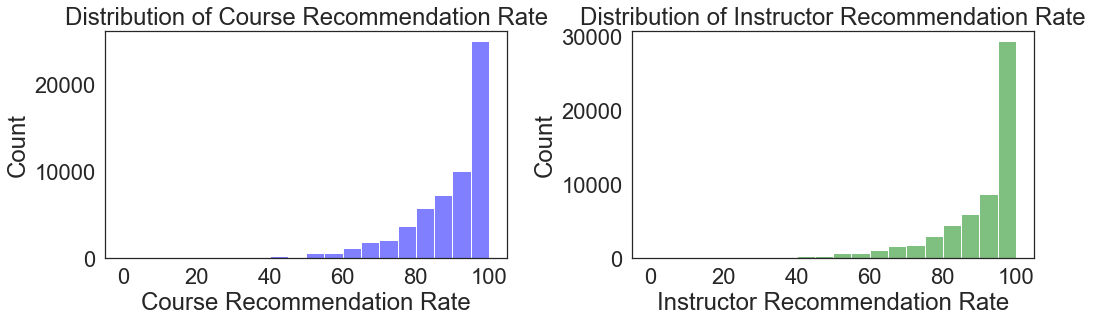

In [272]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plotting histogram for course recommendation rate
sns.histplot(data=df, x='Rcmnd Class', bins=20, color='blue', alpha=0.5, ax=axes[0])
axes[0].set_xlabel('Course Recommendation Rate')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Course Recommendation Rate')

# Plotting histogram for instructor recommendation rate
sns.histplot(data=df, x='Rcmnd Instr', bins=20, color='green', alpha=0.5, ax=axes[1])
axes[1].set_xlabel('Instructor Recommendation Rate')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Instructor Recommendation Rate')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()


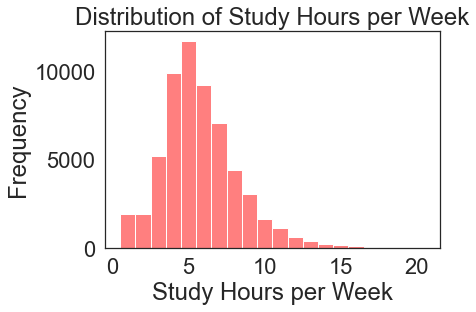

In [273]:
# Plotting histogram for study hours per week
sns.histplot(data=df, x='Study Hrs/wk', bins=20, color='red', alpha=0.5)
plt.xlabel('Study Hours per Week')
plt.ylabel('Frequency')
plt.title('Distribution of Study Hours per Week')
plt.show()

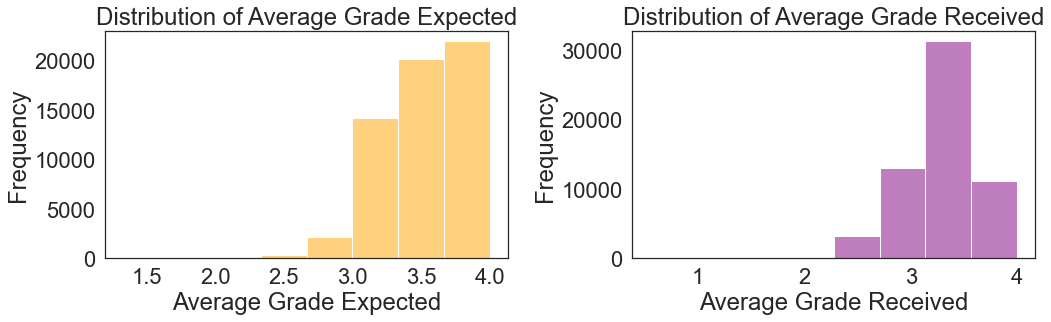

In [274]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plotting histogram for average grade expected
sns.histplot(data=df, x='Avg Grade Expected', bins=8, color='orange', alpha=0.5, ax=axes[0])
axes[0].set_xlabel('Average Grade Expected')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Average Grade Expected')

# Plotting histogram for average grade received
sns.histplot(data=df, x='Avg Grade Received', bins=8, color='purple', alpha=0.5, ax=axes[1])
axes[1].set_xlabel('Average Grade Received')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Average Grade Received')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


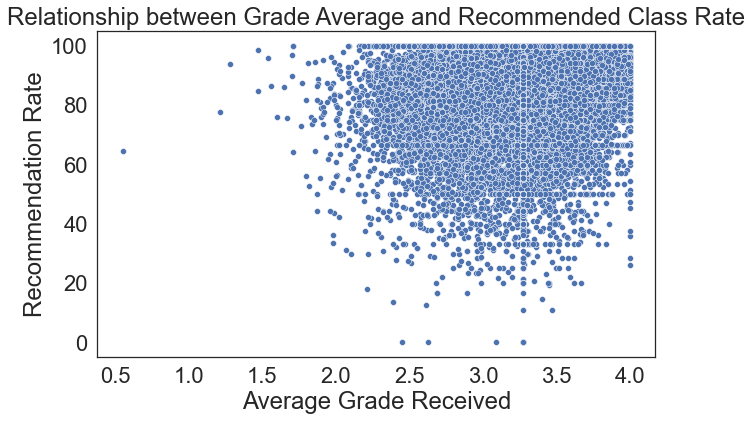

In [275]:
# Scatter plot of course/instructor recommendation rate vs. grade average
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Avg Grade Received', y='Rcmnd Class')
plt.xlabel('Average Grade Received')
plt.ylabel('Recommendation Rate')
plt.title('Relationship between Grade Average and Recommended Class Rate')
plt.show()

The cluster near the top right of a scatter plot of course recommendation rate vs. grade average indicates a positive correlation between these two variables: courses with higher grade averages tend to receive higher recommendation rates from students. 

This positive correlation suggests that students perceive courses or instructors with higher grade averages as providing a better learning experience, which leads to a higher likelihood of recommending the course or instructor to others.

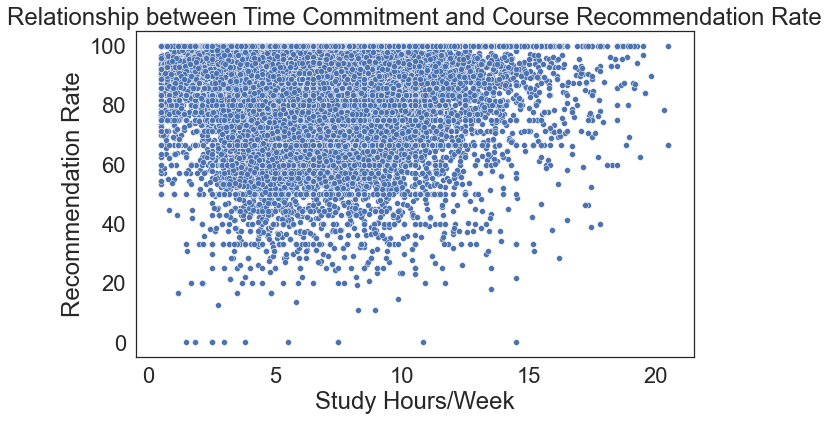

In [276]:
# Scatter plot of course recommendation rate vs. time commitment
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Study Hrs/wk', y='Rcmnd Class')
plt.xlabel('Study Hours/Week')
plt.ylabel('Recommendation Rate')
plt.title('Relationship between Time Commitment and Course Recommendation Rate')
plt.show()

The plot indicates that there is a group of courses or instructors where students tend to give high recommendation rates despite varying levels of time commitment. This suggests that the time commitment may not be the primary factor influencing the recommendation rate for courses or instructors.

In [277]:
def extract_term(text):
    TERMS = { "WI": 1, "SP": 2, "S1": 3, "S2": 4, "S3": 5, "FA": 6, "SU" : 7}
    
    term = text[:2]
    term = TERMS[term]
    
    return term

In [278]:
def extract_year(text):
    
    year = text[2:]
    year = int("20" + year)
    
    return year

In [279]:
new_df['Term_num'] = new_df['Term'].apply(extract_term)
new_df['Year'] = new_df['Term'].apply(extract_year)
new_df.head(5)

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,Department,Category,Term_num,Year
0,"Shtienberg, Gilad",ANAR 116 - Sea Level Change - Israel (A),WI23,27,9,100.0,100.0,3.61,4.00,3.62,anar,Non-STEM,1,2023
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),WI23,17,7,100.0,100.0,7.64,3.57,3.27,anar,Non-STEM,1,2023
2,"Braswell, Geoffrey E.",ANAR 135 - Ancient Mediterranean Civ (A),WI23,24,15,100.0,92.9,3.42,4.00,3.99,anar,Non-STEM,1,2023
3,"Rodriguez, Eric Andrew",ANAR 164 - Underwater Archaeology (A),WI23,41,23,100.0,100.0,4.07,3.80,3.63,anar,Non-STEM,1,2023
4,"Goldstein, Paul S",ANAR 180 - Archaeology Workshop (A),WI23,14,4,100.0,75.0,2.00,4.00,3.27,anar,Non-STEM,1,2023


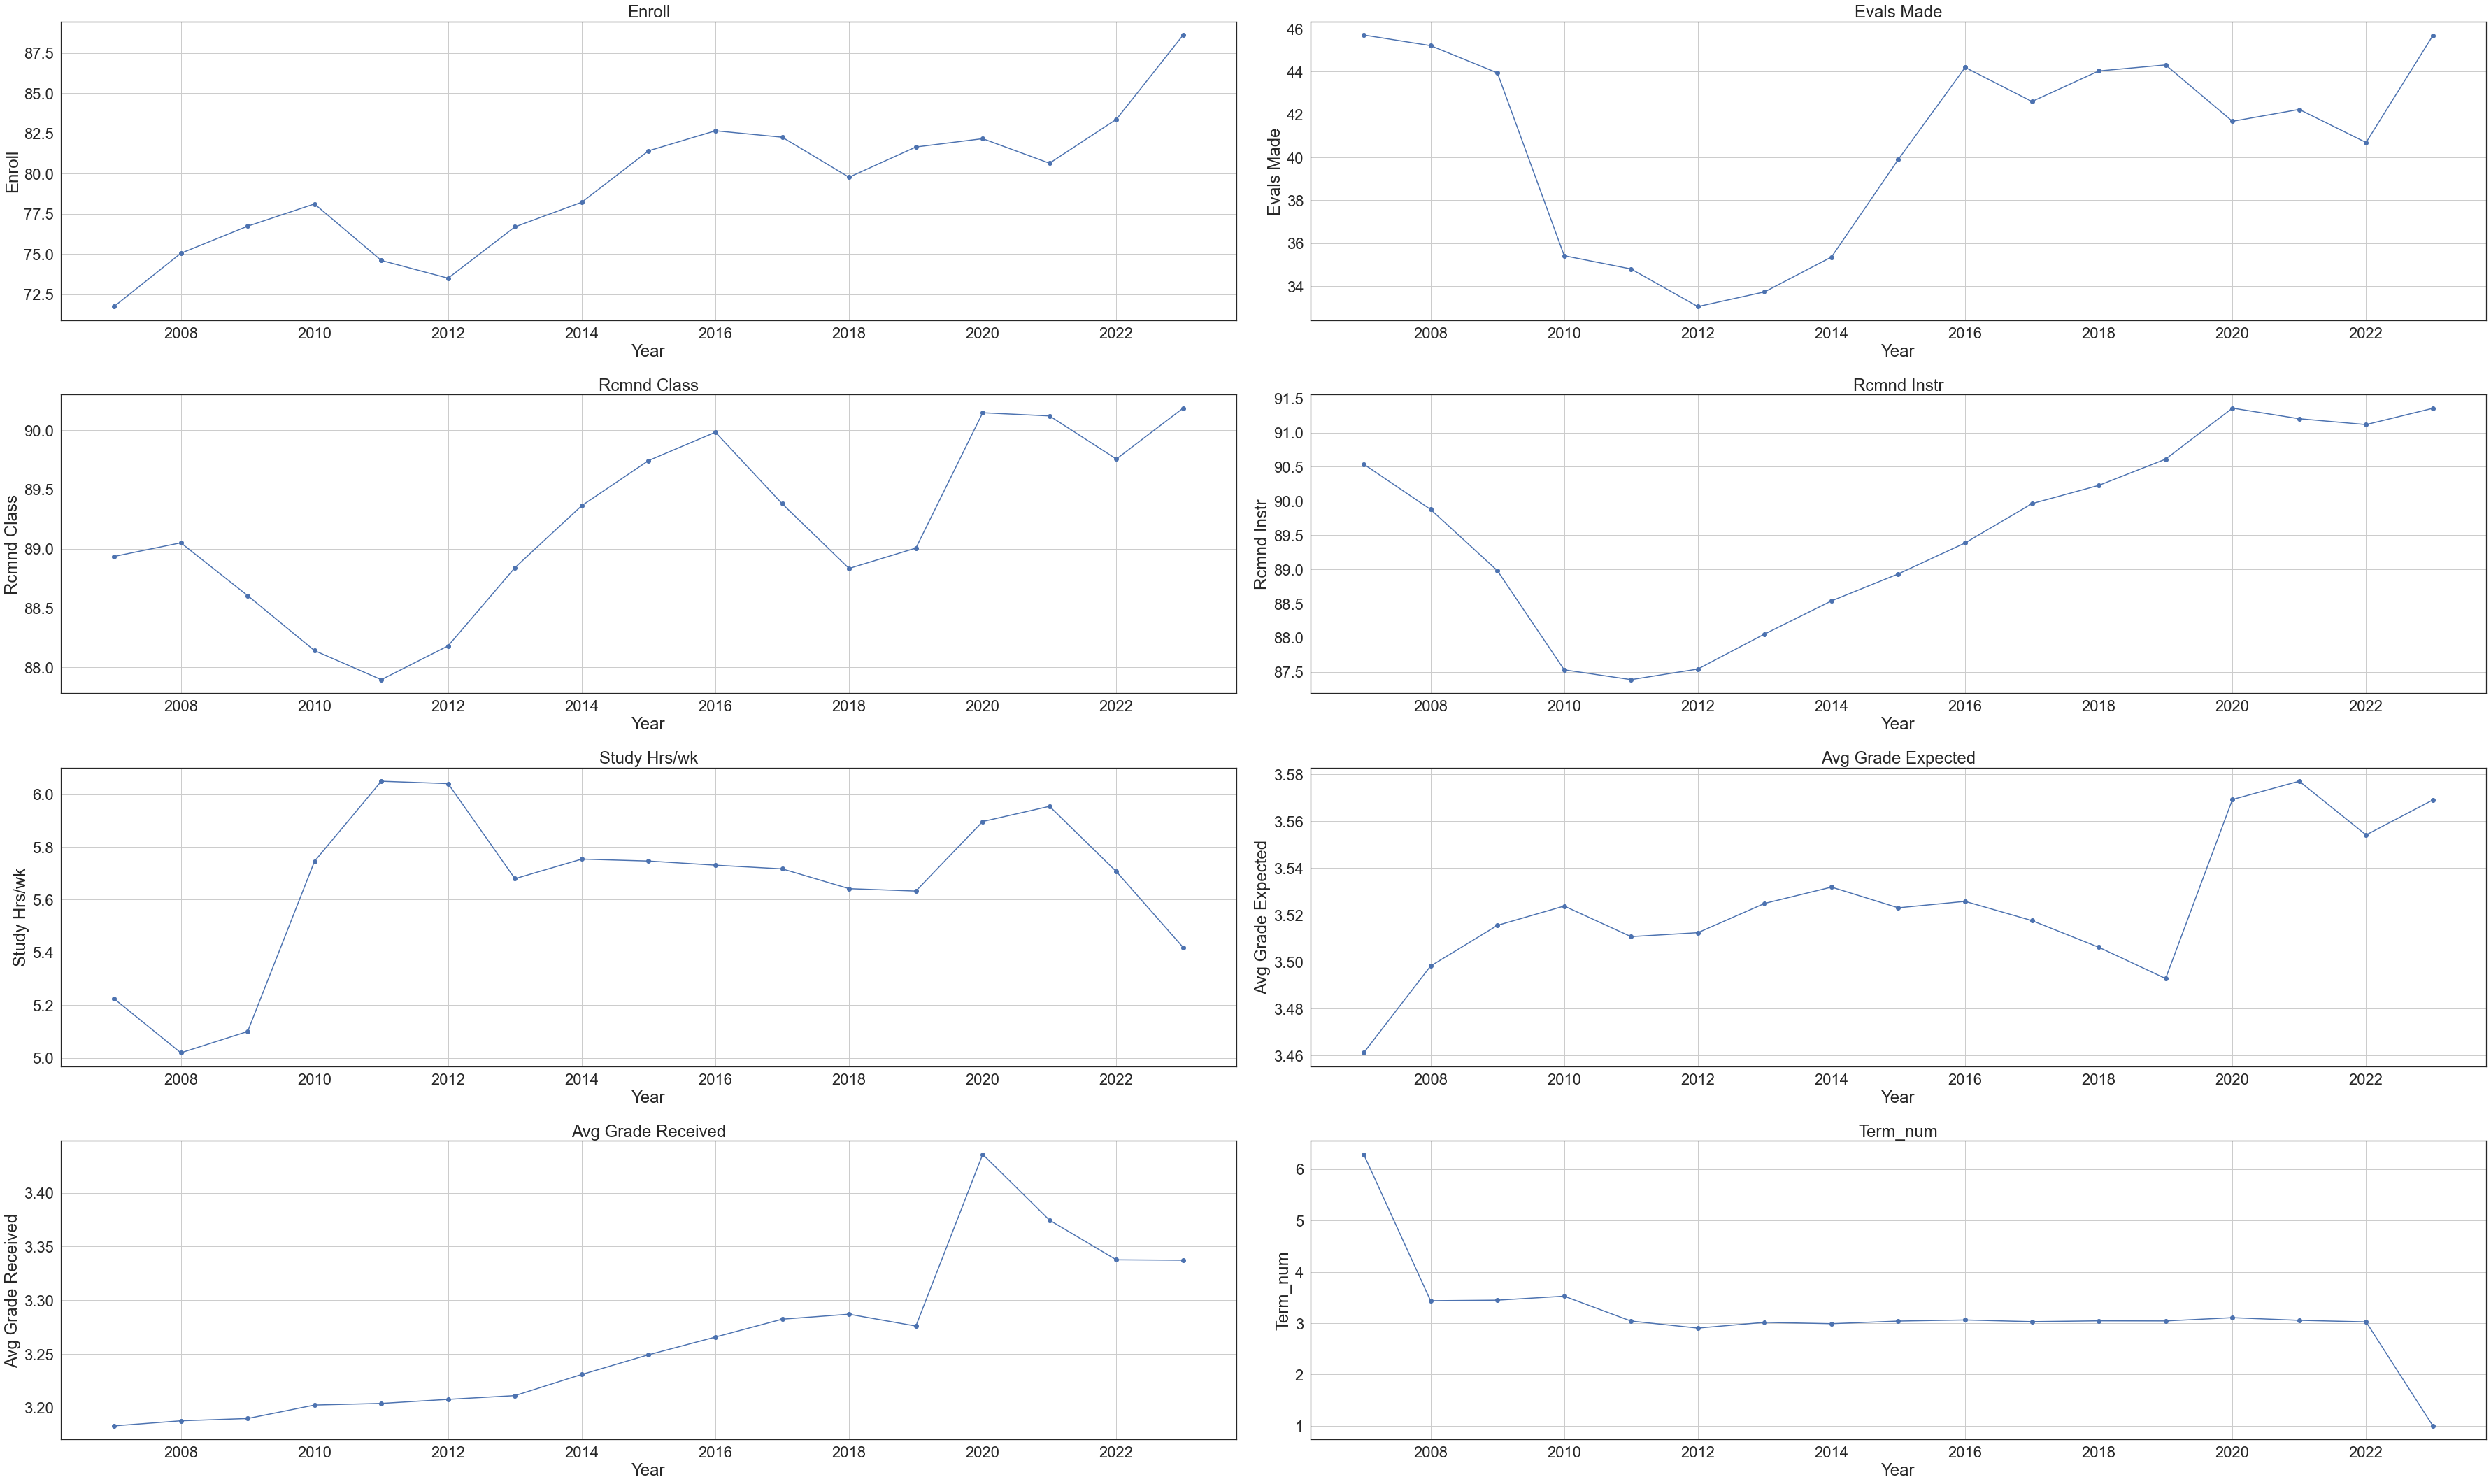

In [280]:
# Group the DataFrame by 'Year' and calculate the mean for each variable
grouped_df = new_df.groupby('Year').mean()

# Get the column names to plot
columns_to_plot = grouped_df.columns

# Calculate the number of rows and columns for subplots
num_plots = len(columns_to_plot)
num_rows = (num_plots - 1) // 2 + 1
num_cols = min(num_plots, 2)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 30))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through each column and plot a line chart on separate axes
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    ax.plot(grouped_df.index, grouped_df[column], marker='o')
    ax.set_xlabel('Year')
    ax.set_ylabel(column)
    ax.set_title(column)
    ax.grid(True)

# Remove any unused subplots
if num_plots < len(axes):
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

From the line plots seen as above, we can see that recommendation class and recommendation instructor rate steadily increased over the years. We observe a similar pattern from Average Grade Received and Average Grade Expected, both of which also increased over time, with peaks during the year of COVID 19 (2020-2022). We hypothesize that Average Grade Received and Average Grade Expected will be the most correlated to recommendation rates among all variables.

### Statistical Analysis

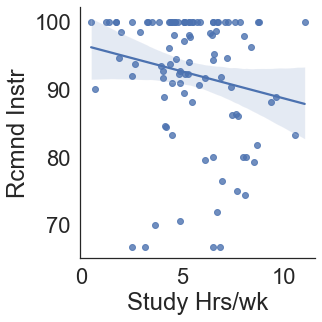

In [281]:
# Calculate the interquartile range (IQR) for the Study Hrs/wk column
study_hrs_Q1 = df['Study Hrs/wk'].quantile(0.25)
study_hrs_Q3 = df['Study Hrs/wk'].quantile(0.75)
study_hrs_IQR = study_hrs_Q3 - study_hrs_Q1

# Calculate the interquartile range (IQR) for the Rcmnd Instr column
rcmnd_Instr_Q1 = df["Rcmnd Instr"].quantile(0.25)
rcmnd_Instr_Q3 = df["Rcmnd Instr"].quantile(0.75)
rcmnd_Instr_IQR = rcmnd_Instr_Q3 - rcmnd_Instr_Q1

# Define the outlier boundaries
study_hrs_lower_bound = study_hrs_Q1 - 1.5 * study_hrs_IQR
study_hrs_upper_bound = study_hrs_Q3 + 1.5 * study_hrs_IQR

rcmnd_Instr_lower_bound = rcmnd_Instr_Q1 - 1.5 * rcmnd_Instr_IQR
rcmnd_Instr_upper_bound = rcmnd_Instr_Q3 + 1.5 * rcmnd_Instr_IQR

# Filter out the outliers
filtered_df = df[
    (df["Study Hrs/wk"] >= study_hrs_lower_bound) &
    (df["Study Hrs/wk"] <= study_hrs_upper_bound) &
    (df["Rcmnd Instr"] >= rcmnd_Instr_lower_bound) &
    (df["Rcmnd Instr"] <= rcmnd_Instr_upper_bound)
]

# sample 100 subsets of filtered dataframe
sampled_df = filtered_df.sample(n=100)  

# Create the scatter plot of Study Hrs/wk vs Rcmn Instr with a best fit line
sns.lmplot(data = sampled_df, x = "Study Hrs/wk", y = "Rcmnd Instr")


From the Scatter Plot of "Study Hrs/wk" vs "Rcmnd Instr", we can see a negative correlation between the two. However, the standard error occasionally includes the slope of 0, after  generating the scatter plot for various samples of 100 subsets. Therefore, there is a possibility that there is no correlation between "Study Hrs/wk" and "Rcmnd Instr".

In [282]:
# carry out linear regression on Study Hrs/wk vs Rcmn Instr
X = sm.add_constant(sampled_df["Study Hrs/wk"])
y = sampled_df["Rcmnd Instr"]
model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Rcmnd Instr   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.310
Date:                Wed, 14 Jun 2023   Prob (F-statistic):             0.0719
Time:                        17:39:28   Log-Likelihood:                -364.38
No. Observations:                 100   AIC:                             732.8
Df Residuals:                      98   BIC:                             738.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           96.6333      2.566     37.654   

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


From the regression results of the Ordinary Least Squares (OLS) model, the coefficient estimate for the "Study Hrs/wk" variable is -1.0749. This suggests that there is a weak negative relationship between the number of study hours per week and the instructor recommendation rate ("Rcmnd Instr"). As the number of study hours per week slightly increases, the instructor recommendation may decrease slightly. The p-value of 0.0191 indicates that the relationship is statistically significant at a 5% level of significance.

However, the R-squared value of 0.055 indicates that only a small portion of the variance in the instructor recommendation rate can be explained by the number of study hours per week. This suggests that other factors may have a stronger influence on the instructor recommendation. As a result, this suggests that the "Study Hrs/wk" variable alone does not have a strong explanatory power in predicting the "Rcmd Instr" variable.

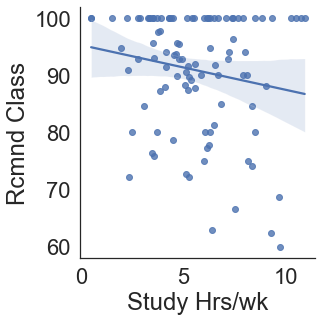

In [283]:
# Calculate the interquartile range (IQR) for the Rcmnd Class column
rcmnd_Class_Q1 = df["Rcmnd Class"].quantile(0.25)
rcmnd_Class_Q3 = df["Rcmnd Class"].quantile(0.75)
rcmnd_Class_IQR = rcmnd_Class_Q3 - rcmnd_Class_Q1

# Define the outlier boundaries
rcmnd_Class_lower_bound = rcmnd_Class_Q1 - 1.5 * rcmnd_Class_IQR
rcmnd_Class_upper_bound = rcmnd_Class_Q3 + 1.5 * rcmnd_Class_IQR

# Filter out the outliers
filtered_df = df[
    (df["Study Hrs/wk"] >= study_hrs_lower_bound) &
    (df["Study Hrs/wk"] <= study_hrs_upper_bound) &
    (df["Rcmnd Class"] >= rcmnd_Class_lower_bound) &
    (df["Rcmnd Class"] <= rcmnd_Class_upper_bound)
]

# sample 100 subsets of filtered dataframe
sampled_df = filtered_df.sample(n=100)  

# Create the scatter plot of Study Hrs/wk vs Rcmnd Class with a best fit line
sns.lmplot(data = sampled_df, x = "Study Hrs/wk", y = "Rcmnd Class")

From the Scatter Plot of "Study Hrs/wk" vs "Rcmnd Class", we can see a negative correlation between the two. However, the standard error occasionally includes the slope of 0, after  generating the scatter plots for various samples of 100 subsets. Therefore, there is a possibility that there is no correlation between "Study Hrs/wk" and "Rcmnd Instr".

In [284]:
# carry out linear regression on Study Hrs/wk vs Rcmnd Class
X = sm.add_constant(sampled_df["Study Hrs/wk"])
y = sampled_df["Rcmnd Class"]
model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Rcmnd Class   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     3.004
Date:                Wed, 14 Jun 2023   Prob (F-statistic):             0.0862
Time:                        17:39:29   Log-Likelihood:                -373.90
No. Observations:                 100   AIC:                             751.8
Df Residuals:                      98   BIC:                             757.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           95.2945      2.736     34.833   

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


From the regression results of the model generated, the coefficient estimate is negative and close to zero. This suggests that there is a weak negative relationship between "Study Hrs/wk" and "Rcmnd Class". As the number of study hours per week is slightly increasing, the recommendation of the instructor may decrease slightly. The p-value also varies between each sample of 100 subsets, some falling below 0.05 and some falling above 0.05. The R-squared value seems to be very low across the samples of 100 subsets. This indicates that a low percent of the variance in the "Rcmnd Class" variable that can be explained by "Study Hrs/wk" variable. As a result, this suggests that the "Study Hrs/wk" variable alone does not have a strong explanatory power in predicting the "Rcmd Class" variable.

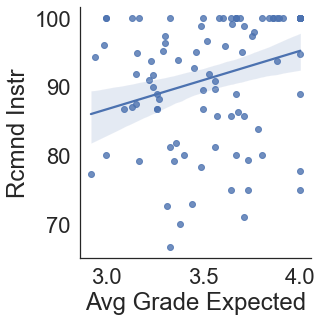

In [285]:
# Calculate the interquartile range (IQR) for the Avg Grade Expected column
avg_Grade_Q1 = df["Avg Grade Expected"].quantile(0.25)
avg_Grade_Q3 = df["Avg Grade Expected"].quantile(0.75)
avg_Grade_IQR = avg_Grade_Q3 - avg_Grade_Q1

# Define the outlier boundaries
avg_Grade_lower_bound = avg_Grade_Q1 - 1.5 * avg_Grade_IQR
avg_Grade_upper_bound = avg_Grade_Q3 + 1.5 * avg_Grade_IQR

# Filter out the outliers
filtered_df = df[
    (df["Avg Grade Expected"] >= avg_Grade_lower_bound) &
    (df["Avg Grade Expected"] <= avg_Grade_upper_bound) &
    (df["Rcmnd Instr"] >= rcmnd_Instr_lower_bound) &
    (df["Rcmnd Instr"] <= rcmnd_Instr_upper_bound)
]

# sample 100 subsets of filtered dataframe
sampled_df = filtered_df.sample(n=100)  

# Create the scatter plot of Avg Grade Expected vs Rcmnd Instr with a best fit line
sns.lmplot(data = sampled_df, x = "Avg Grade Expected", y = "Rcmnd Instr")

From the scatter plot of "Avg Grade Expected" vs "Rcmnd Instr", we can see a strong positive correlation between the two. The Standard Error also seems to be smaller compared to the the scatter plots of "Study Hrs/wk" vs "Rcmnd Instr" and "Study Hrs/wk" vs "Rcmnd Class". The standard error does not contain the slope of 0. Therefore, there is a high possibility that there is a correlation between "Avg Grade Expected" and "Rcmnd Instr".

In [286]:
# carry out linear regression on Avg Grade Expected vs Rcmn Instr
X = sm.add_constant(sampled_df["Avg Grade Expected"])
y = sampled_df["Rcmnd Instr"]
model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Rcmnd Instr   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     9.422
Date:                Wed, 14 Jun 2023   Prob (F-statistic):            0.00277
Time:                        17:39:29   Log-Likelihood:                -358.03
No. Observations:                 100   AIC:                             720.1
Df Residuals:                      98   BIC:                             725.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 61.1112      9

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


From the regression results of the model generated, the coefficient estimate is positive and big. This suggests that there is a strong positive relationship between "Avg Grade Expected" and "Rcmnd Instr". As the average grade expected is increasing, the recommendation of the instructor may increase substantially. The p-value is also consistently below 0.05, which suggest that there is relationship between "Avg Grade Expected" and "Rcmnd Instr" The R-squared value seems to be consistently below 50% but never too low across the samples of 100 subsets. This indicates that there is some percent of the variance in the "Rcmnd Instr" variable that can be explained by "Avg Grade Expected" variable. As a result, this suggests that the "Avg Grade Expected" has some explanatory power in predicting the "Rcmd Instr" variable.

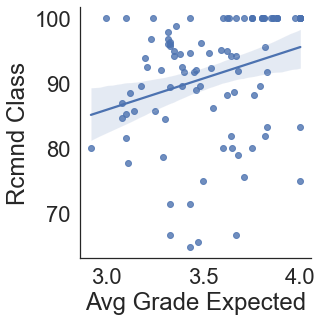

In [287]:
# Filter out the outliers
filtered_df = df[
    (df["Avg Grade Expected"] >= avg_Grade_lower_bound) &
    (df["Avg Grade Expected"] <= avg_Grade_upper_bound) &
    (df["Rcmnd Class"] >= rcmnd_Class_lower_bound) &
    (df["Rcmnd Class"] <= rcmnd_Class_upper_bound)
]

# sample 100 subsets of filtered dataframe
sampled_df = filtered_df.sample(n=100)  

# Create the scatter plot of Avg Grade Expected vs Rcmnd Class with a best fit line
sns.lmplot(data = sampled_df, x = "Avg Grade Expected", y = "Rcmnd Class")

From the scatter plot of "Avg Grade Expected" vs "Rcmnd Class", we can see a strong positive correlation between the two. The Standard Error also seems to be smaller compared to the the scatter plots of "Study Hrs/wk" vs "Rcmnd Instr" and "Study Hrs/wk" vs "Rcmnd Class". The standard error does not contain the slope of 0. Therefore, there is a high possibility that there is a correlation between "Avg Grade Expected" and "Rcmnd Class".

In [288]:
# carry out linear regression on Avg Grade Expected vs Rcmnd Class
X = sm.add_constant(sampled_df["Avg Grade Expected"])
y = sampled_df["Rcmnd Class"]
model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Rcmnd Class   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     9.061
Date:                Wed, 14 Jun 2023   Prob (F-statistic):            0.00332
Time:                        17:39:30   Log-Likelihood:                -361.06
No. Observations:                 100   AIC:                             726.1
Df Residuals:                      98   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 56.8805     11

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


From the regression results of the model generated, the coefficient estimate is positive and big. This suggests that there is a strong positive relationship between "Avg Grade Expected" and "Rcmnd Class". As the average grade expected is increasing, the recommendation of the Class may increase substantially. The p-value is also consistently below 0.05, which suggest that there is relationship between "Avg Grade Expected" and "Rcmnd Class" The R-squared value seems to be consistently below 50% but never too low across the samples of 100 subsets. This indicates that there is some percent of the variance in the "Rcmnd Class" variable that can be explained by "Avg Grade Expected" variable. As a result, this suggests that the "Avg Grade Expected" has some explanatory power in predicting the "Rcmd Class" variable.

## STEM and NON-STEM 

In [289]:
# Make a copy of existing data
new_df = df

In [290]:
def classify(string):
    string = string[0:5] #Only takes the first 4 letters of the course
    string = string.lower().strip()
    output = ''.join(map(lambda c: '' if c in '0123456789' else c, string)) #Eliminate any numbers
    return output.strip()

In [291]:
# Apply function for the whole dataframe
new_df['Department'] = new_df['Course'].apply(classify)

In [292]:
all_courses = new_df['Department'].unique()
all_courses

array(['anar', 'anbi', 'ansc', 'anth', 'anld', 'beng', 'bibc', 'bicd',
       'bieb', 'bild', 'bimm', 'bipn', 'bisp', 'sio', 'cat', 'ceng',
       'cgs', 'chem', 'chin', 'cogs', 'dsgn', 'comm', 'cocu', 'cogn',
       'cohi', 'comt', 'cosf', 'cont', 'cse', 'doc', 'ece', 'eng', 'econ',
       'eds', 'envr', 'erc', 'hmnr', 'esys', 'ethn', 'film', 'fpmu',
       'hdp', 'hiaf', 'hiea', 'hieu', 'hila', 'hild', 'hine', 'hisc',
       'hito', 'hius', 'higl', 'hum', 'icam', 'intl', 'japn', 'jwsp',
       'juda', 'lati', 'laws', 'lign', 'lihl', 'lisp', 'liab', 'ligm',
       'liit', 'lipo', 'ltaf', 'ltch', 'ltcs', 'ltea', 'lten', 'lteu',
       'ltfr', 'ltgk', 'ltgm', 'ltit', 'ltko', 'ltla', 'ltru', 'ltsp',
       'ltth', 'ltwl', 'ltwr', 'ltam', 'mae', 'math', 'mmw', 'muir',
       'mus', 'nano', 'phil', 'phys', 'poli', 'soci', 'psyc', 'reli',
       'rev', 'mgt', 'elwr', 'se', 'se l', 'soce', 'soca', 'socb', 'socc',
       'socd', 'socl', 'glbh', 'stpa', 'sxth', 'tdac', 'tdde', 'tddm',
       '

In [293]:
# Create list of only STEM courses
stem = ['beng','bibc','bicd','bieb','bild','bimm','bipn','bisp',
        'sio','ceng','chem','cogs','cse','ece','eng','envr','erc',
        'esys','fpmu','mae','math','nano','phys','soci','se','glbh']

In [294]:
# Create non-STEM list
non_stem = []
for i in all_courses:
    if i not in stem:
        non_stem.append(i)

In [295]:
# Funtion to assign the course to STEM or non_STEM
def category(string):
    if string in stem:
        return 'STEM'
    else:
        return 'Non-STEM'

In [296]:
new_df['Category'] = new_df['Department'].apply(category)

In [297]:
# Create 2 dataframes by separating into STEM and Non-STEM
non_stem_df = new_df[new_df["Category"]=='Non-STEM']
stem_df = new_df[new_df["Category"]=='STEM']

#### STEM DATAFRAME

In [298]:
stem_df.head(5)

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,Department,Category
1178,"Sah, Robert Lie-Yuan",BENG 1 - Introduction to Bioengineering (A),WI23,157,88,69.4,76.5,3.17,3.57,3.27,beng,STEM
1179,"Valdez-Jasso, Daniela",BENG 112A - Soft Tissue Biomechanics (A),WI23,65,21,81.0,100.0,6.69,3.24,2.86,beng,STEM
1180,"Taylor Amos, Alyssa C",BENG 119B - Design Implmntatn Biomechanics (A),WI23,22,5,100.0,100.0,6.10,4.00,3.87,beng,STEM
1181,"Wheeler, Bruce Christopher",BENG 119B - Design Implmntatn Biomechanics (A),WI23,22,5,100.0,100.0,6.10,4.00,3.87,beng,STEM
1182,"Huang, Xiaohua",BENG 120 - Org Chem-Structural & Design (A),WI23,56,25,68.0,64.0,4.82,3.44,3.66,beng,STEM


#### NON-STEM DATAFRAME

In [299]:
non_stem_df.head(5)

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,Department,Category
0,"Shtienberg, Gilad",ANAR 116 - Sea Level Change - Israel (A),WI23,27,9,100.0,100.0,3.61,4.00,3.62,anar,Non-STEM
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),WI23,17,7,100.0,100.0,7.64,3.57,3.27,anar,Non-STEM
2,"Braswell, Geoffrey E.",ANAR 135 - Ancient Mediterranean Civ (A),WI23,24,15,100.0,92.9,3.42,4.00,3.99,anar,Non-STEM
3,"Rodriguez, Eric Andrew",ANAR 164 - Underwater Archaeology (A),WI23,41,23,100.0,100.0,4.07,3.80,3.63,anar,Non-STEM
4,"Goldstein, Paul S",ANAR 180 - Archaeology Workshop (A),WI23,14,4,100.0,75.0,2.00,4.00,3.27,anar,Non-STEM


#### EDA

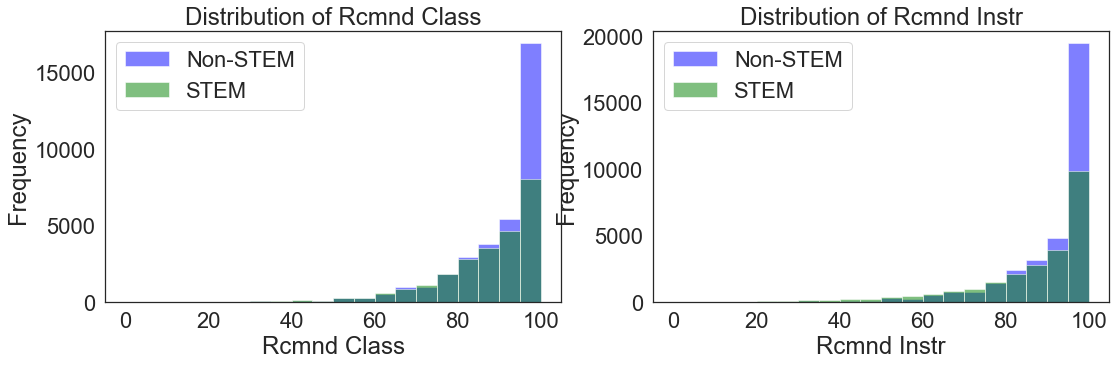

In [300]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

# Plotting distribution for non-stem average study hours/week
ax1.hist(non_stem_df['Rcmnd Class'], bins=20, color='blue', alpha=0.5, label='Non-STEM')

# Plotting distribution for stem average study hours/week
ax1.hist(stem_df['Rcmnd Class'], bins=20, color='green', alpha=0.5, label='STEM')

ax1.set_xlabel('Rcmnd Class')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Rcmnd Class')
ax1.legend()

# Plotting distribution for non-stem average grades expected
ax2.hist(non_stem_df['Rcmnd Instr'], bins=20, color='blue', alpha=0.5, label='Non-STEM')

# Plotting distribution for stem average grades expected
ax2.hist(stem_df['Rcmnd Instr'], bins=20, color='green', alpha=0.5, label='STEM')

ax2.set_xlabel('Rcmnd Instr')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Rcmnd Instr')
ax2.legend()


From the plots above, it can be observed that STEM major has lower Recommendation Rate than Non-STEM major on average. 

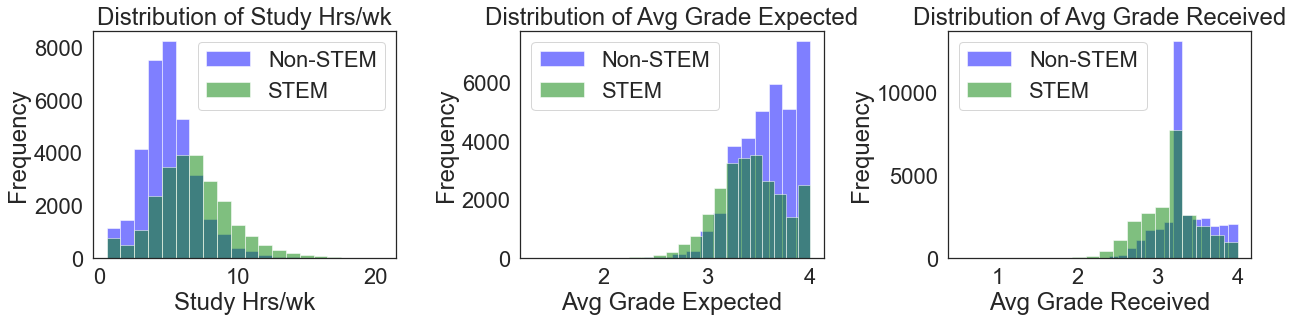

In [301]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Plotting distribution for non-stem average study hours/week
ax1.hist(non_stem_df['Study Hrs/wk'], bins=20, color='blue', alpha=0.5, label='Non-STEM')

# Plotting distribution for stem average study hours/week
ax1.hist(stem_df['Study Hrs/wk'], bins=20, color='green', alpha=0.5, label='STEM')

ax1.set_xlabel('Study Hrs/wk')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Study Hrs/wk')
ax1.legend()

# Plotting distribution for non-stem average grades expected
ax2.hist(non_stem_df['Avg Grade Expected'], bins=20, color='blue', alpha=0.5, label='Non-STEM')

# Plotting distribution for stem average grades expected
ax2.hist(stem_df['Avg Grade Expected'], bins=20, color='green', alpha=0.5, label='STEM')

ax2.set_xlabel('Avg Grade Expected')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Avg Grade Expected')
ax2.legend()

# Plotting distribution for non-stem average grades received
ax3.hist(non_stem_df['Avg Grade Received'], bins=20, color='blue', alpha=0.5, label='Non-STEM')

# Plotting distribution for stem average grades received
ax3.hist(stem_df['Avg Grade Received'], bins=20, color='green', alpha=0.5, label='STEM')

ax3.set_xlabel('Avg Grade Received')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Avg Grade Received')
ax3.legend()

plt.tight_layout()

plt.show()

- From the distribution plots above, we can observe that on average, the study hours/week of STEM major are higher, the mean is around 8 hours/week while for Non-Stem major it is around 5 hours/week.

- Non-STEM major on average has higher Average Grade Expected and Average Grade Received than STEM major. 

- These difference might influence the course/instructor rating between STEM and Non-STEM. 

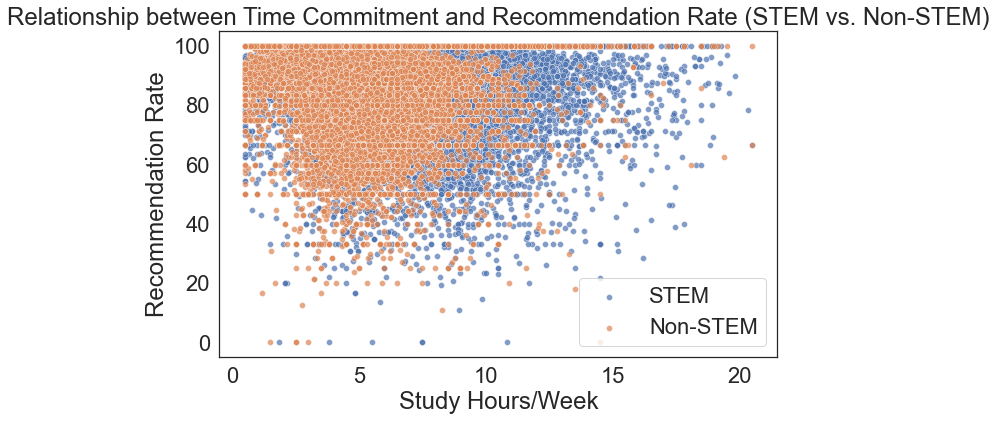

In [302]:
plt.figure(figsize=(10, 6))

# Scatter plot of course/instructor recommendation rate vs. time commitment for STEM courses
sns.scatterplot(data=stem_df, x='Study Hrs/wk', y='Rcmnd Class', label='STEM', alpha=0.7)
# Scatter plot of course/instructor recommendation rate vs. time commitment for non-STEM courses
sns.scatterplot(data=non_stem_df, x='Study Hrs/wk', y='Rcmnd Class', label='Non-STEM', alpha=0.7)

plt.xlabel('Study Hours/Week')
plt.ylabel('Recommendation Rate')
plt.title('Relationship between Time Commitment and Recommendation Rate (STEM vs. Non-STEM)')
plt.legend()
plt.show()

It can be observed that for both Non-STEM major and STEM major, time commitment may not be the primary factor influencing the recommendation rate for courses or instructors, taking into account the fact that Study Hours/Week for Non-STEM major on average is less than that of STEM major. 

### Statistical Analysis on STEM and Non-STEM categories

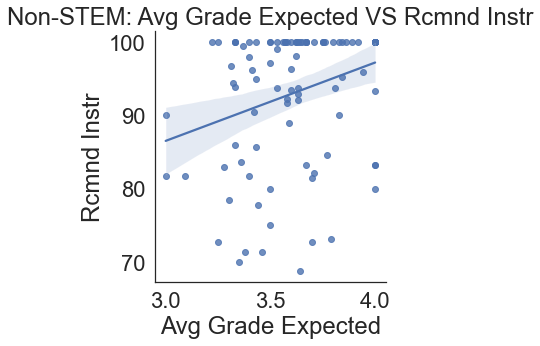

In [303]:
# Calculate the interquartile range (IQR) for the Avg Grade Expected column for Non-STEM courses
non_stem_df_avg_Grade_Q1 = non_stem_df["Avg Grade Expected"].quantile(0.25)
non_stem_df_avg_Grade_Q3 = non_stem_df["Avg Grade Expected"].quantile(0.75)
non_stem_avg_Grade_IQR = non_stem_df_avg_Grade_Q3 - non_stem_df_avg_Grade_Q1

# Calculate the interquartile range (IQR) for the Rcmnd Instr column for Non-STEM courses
non_stem_rcmnd_Instr_Q1 = non_stem_df["Rcmnd Instr"].quantile(0.25)
non_stem_rcmnd_Instr_Q3 = non_stem_df["Rcmnd Instr"].quantile(0.75)
non_stem_rcmnd_Instr_IQR = non_stem_rcmnd_Instr_Q3 - non_stem_rcmnd_Instr_Q1

# Define the outlier boundaries
non_stem_avg_Grade_lower_bound = non_stem_df_avg_Grade_Q1 - 1.5 * non_stem_avg_Grade_IQR
non_stem_avg_Grade_upper_bound = non_stem_df_avg_Grade_Q3 + 1.5 * non_stem_avg_Grade_IQR

non_stem_rcmnd_Instr_lower_bound = non_stem_rcmnd_Instr_Q1 - 1.5 * non_stem_rcmnd_Instr_IQR
non_stem_rcmnd_Instr_upper_bound = non_stem_rcmnd_Instr_Q3 + 1.5 * non_stem_rcmnd_Instr_IQR

# Filter out the outliers
filtered_df = non_stem_df[
    (non_stem_df["Avg Grade Expected"] >= non_stem_avg_Grade_lower_bound) &
    (non_stem_df["Avg Grade Expected"] <= non_stem_avg_Grade_upper_bound) &
    (non_stem_df["Rcmnd Instr"] >= non_stem_rcmnd_Instr_lower_bound) &
    (non_stem_df["Rcmnd Instr"] <= non_stem_rcmnd_Instr_upper_bound)
]

# sample 100 subsets of filtered dataframe
sampled_df = filtered_df.sample(n=100)  

# Create the scatter plot of Avg Grade Expected vs Rcmnd Instr with a best fit line
sns.lmplot(data = sampled_df, x = "Avg Grade Expected", y = "Rcmnd Instr")

# Set the title
plt.title('Non-STEM: Avg Grade Expected VS Rcmnd Instr')

# Display the plot
plt.show()

From the scatter plot of "Avg Grade Expected" vs "Rcmnd Instr", we can see a strong positive correlation between the two. The Standard Error also seems to be small and it does not contain the slope of 0. Therefore, there is a high possibility that there is a correlation between "Avg Grade Expected" and "Rcmnd Instr" for Non-STEM courses.

In [304]:
# carry out linear regression on Avg Grade Expected vs Rcmnd Instr for Non-STEM courses
X = sm.add_constant(sampled_df["Avg Grade Expected"])
y = sampled_df["Rcmnd Instr"]
model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Rcmnd Instr   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     9.488
Date:                Wed, 14 Jun 2023   Prob (F-statistic):            0.00268
Time:                        17:39:38   Log-Likelihood:                -358.15
No. Observations:                 100   AIC:                             720.3
Df Residuals:                      98   BIC:                             725.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 54.4735     12

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


From the regression results of the model generated, the coefficient estimate is positive and big. This suggests that there is a strong positive relationship between "Avg Grade Expected" and "Rcmnd Instr" for Non-STEM courses. As the average grade expected is increasing, the recommendation of the instructor may increase substantially. The p-value is also consistently below 0.05, which suggest that there is relationship between "Avg Grade Expected" and "Rcmnd Instr". The R-squared value seems to be consistently below 50% but never too low across the samples of 100 subsets. This indicates that there is some percent of the variance in the "Rcmnd Instr" variable that can be explained by "Avg Grade Expected" variable. As a result, this suggests that the "Avg Grade Expected" has some explanatory power in predicting the "Rcmd Instr" variable.

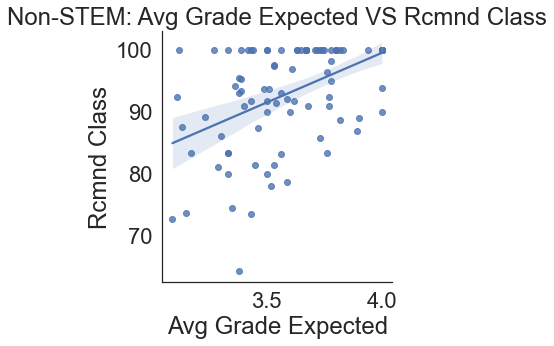

In [305]:
# Calculate the interquartile range (IQR) for the Rcmnd Class column for Non-STEM courses
non_stem_rcmnd_Class_Q1 = non_stem_df["Rcmnd Class"].quantile(0.25)
non_stem_rcmnd_Class_Q3 = non_stem_df["Rcmnd Class"].quantile(0.75)
non_stem_rcmnd_Class_IQR = non_stem_rcmnd_Class_Q3 - non_stem_rcmnd_Class_Q1

# Define the outlier boundaries
non_stem_rcmnd_Class_lower_bound = non_stem_rcmnd_Class_Q1 - 1.5 * non_stem_rcmnd_Class_IQR
non_stem_rcmnd_Class_upper_bound = non_stem_rcmnd_Class_Q3 + 1.5 * non_stem_rcmnd_Class_IQR

# Filter out the outliers
filtered_df = non_stem_df[
    (non_stem_df["Avg Grade Expected"] >= non_stem_avg_Grade_lower_bound) &
    (non_stem_df["Avg Grade Expected"] <= non_stem_avg_Grade_upper_bound) &
    (non_stem_df["Rcmnd Class"] >= non_stem_rcmnd_Class_lower_bound) &
    (non_stem_df["Rcmnd Class"] <= non_stem_rcmnd_Class_upper_bound)
]

# sample 100 subsets of filtered dataframe
sampled_df = filtered_df.sample(n=100)  

# Create the scatter plot of Avg Grade Expected vs Rcmnd Instr with a best fit line
sns.lmplot(data = sampled_df, x = "Avg Grade Expected", y = "Rcmnd Class")

# Set the title
plt.title('Non-STEM: Avg Grade Expected VS Rcmnd Class')

# Display the plot
plt.show()

From the scatter plot of "Avg Grade Expected" vs "Rcmnd Class", we can see a strong positive correlation between the two. The Standard Error also seems to be small and it does not contain the slope of 0. Therefore, there is a high possibility that there is a correlation between "Avg Grade Expected" and "Rcmnd Class" for Non-STEM courses.

In [306]:
# carry out linear regression on Avg Grade Expected vs Rcmnd Class for Non-STEM courses
X = sm.add_constant(sampled_df["Avg Grade Expected"])
y = sampled_df["Rcmnd Class"]
model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Rcmnd Class   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     32.61
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.20e-07
Time:                        17:39:39   Log-Likelihood:                -337.70
No. Observations:                 100   AIC:                             679.4
Df Residuals:                      98   BIC:                             684.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 35.4212     10

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


From the regression results of the model generated, the coefficient estimate is positive and big. This suggests that there is a strong positive relationship between "Avg Grade Expected" and "Rcmnd Class" for Non-STEM courses. As the average grade expected is increasing, the recommendation of the Class may increase substantially. The p-value is also consistently below 0.05, which suggest that there is relationship between "Avg Grade Expected" and "Rcmnd Class". The R-squared value seems to be consistently below 50% but never too low across the samples of 100 subsets. This indicates that there is some percent of the variance in the "Rcmnd Class" variable that can be explained by "Avg Grade Expected" variable. As a result, this suggests that the "Avg Grade Expected" has some explanatory power in predicting the "Rcmd Class" variable.

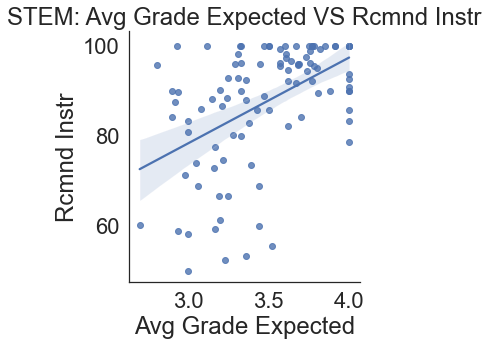

In [307]:
# Calculate the interquartile range (IQR) for the Avg Grade Expected column for STEM courses
stem_df_avg_Grade_Q1 = stem_df["Avg Grade Expected"].quantile(0.25)
stem_df_avg_Grade_Q3 = stem_df["Avg Grade Expected"].quantile(0.75)
stem_avg_Grade_IQR = stem_df_avg_Grade_Q3 - stem_df_avg_Grade_Q1

# Calculate the interquartile range (IQR) for the Rcmnd Instr column for STEM courses
stem_rcmnd_Instr_Q1 = stem_df["Rcmnd Instr"].quantile(0.25)
stem_rcmnd_Instr_Q3 = stem_df["Rcmnd Instr"].quantile(0.75)
stem_rcmnd_Instr_IQR = stem_rcmnd_Instr_Q3 - stem_rcmnd_Instr_Q1

# Define the outlier boundaries
stem_avg_Grade_lower_bound = stem_df_avg_Grade_Q1 - 1.5 * stem_avg_Grade_IQR
stem_avg_Grade_upper_bound = stem_df_avg_Grade_Q3 + 1.5 * stem_avg_Grade_IQR

stem_rcmnd_Instr_lower_bound = stem_rcmnd_Instr_Q1 - 1.5 * stem_rcmnd_Instr_IQR
stem_rcmnd_Instr_upper_bound = stem_rcmnd_Instr_Q3 + 1.5 * stem_rcmnd_Instr_IQR

# Filter out the outliers
filtered_df = stem_df[
    (stem_df["Avg Grade Expected"] >= stem_avg_Grade_lower_bound) &
    (stem_df["Avg Grade Expected"] <= stem_avg_Grade_upper_bound) &
    (stem_df["Rcmnd Instr"] >= stem_rcmnd_Instr_lower_bound) &
    (stem_df["Rcmnd Instr"] <= stem_rcmnd_Instr_upper_bound)
]

# sample 100 subsets of filtered dataframe
sampled_df = filtered_df.sample(n=100)  

# Create the scatter plot of Avg Grade Expected vs Rcmnd Instr with a best fit line
sns.lmplot(data = sampled_df, x = "Avg Grade Expected", y = "Rcmnd Instr")

# Set the title
plt.title('STEM: Avg Grade Expected VS Rcmnd Instr')

# Display the plot
plt.show()

From the scatter plot of "Avg Grade Expected" vs "Rcmnd Instr", we can see a strong positive correlation between the two. The Standard Error also seems to be small and it does not contain the slope of 0. Therefore, there is a high possibility that there is a correlation between "Avg Grade Expected" and "Rcmnd Instr" for STEM courses.

In [308]:
# carry out linear regression on Avg Grade Expected vs Rcmnd Instr for STEM courses
X = sm.add_constant(sampled_df["Avg Grade Expected"])
y = sampled_df["Rcmnd Instr"]
model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Rcmnd Instr   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     30.90
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           2.34e-07
Time:                        17:39:40   Log-Likelihood:                -387.60
No. Observations:                 100   AIC:                             779.2
Df Residuals:                      98   BIC:                             784.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 21.0666     12

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


From the regression results of the model generated, the coefficient estimate is positive and big. This suggests that there is a strong positive relationship between "Avg Grade Expected" and "Rcmnd Instr" for STEM courses. As the average grade expected is increasing, the recommendation of the instructor may increase substantially. The p-value is also consistently below 0.05, which suggest that there is relationship between "Avg Grade Expected" and "Rcmnd Instr". The R-squared value seems to be consistently below 50% but never too low across the samples of 100 subsets. This indicates that there is some percent of the variance in the "Rcmnd Instr" variable that can be explained by "Avg Grade Expected" variable. As a result, this suggests that the "Avg Grade Expected" has some explanatory power in predicting the "Rcmd Instr" variable.

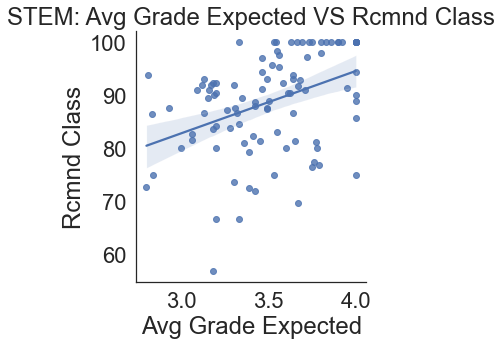

In [309]:
# Calculate the interquartile range (IQR) for the Rcmnd Class column for STEM courses
stem_rcmnd_Class_Q1 = stem_df["Rcmnd Class"].quantile(0.25)
stem_rcmnd_Class_Q3 = stem_df["Rcmnd Class"].quantile(0.75)
stem_rcmnd_Class_IQR = stem_rcmnd_Class_Q3 - stem_rcmnd_Class_Q1

# Define the outlier boundaries
stem_rcmnd_Class_lower_bound = stem_rcmnd_Class_Q1 - 1.5 * stem_rcmnd_Class_IQR
stem_rcmnd_Class_upper_bound = stem_rcmnd_Class_Q3 + 1.5 * stem_rcmnd_Class_IQR

# Filter out the outliers
filtered_df = stem_df[
    (stem_df["Avg Grade Expected"] >= stem_avg_Grade_lower_bound) &
    (stem_df["Avg Grade Expected"] <= stem_avg_Grade_upper_bound) &
    (stem_df["Rcmnd Class"] >= stem_rcmnd_Class_lower_bound) &
    (stem_df["Rcmnd Class"] <= stem_rcmnd_Class_upper_bound)
]

# sample 100 subsets of filtered dataframe
sampled_df = filtered_df.sample(n=100)  

# Create the scatter plot of Avg Grade Expected vs Rcmnd Class with a best fit line
sns.lmplot(data = sampled_df, x = "Avg Grade Expected", y = "Rcmnd Class")

# Set the title
plt.title('STEM: Avg Grade Expected VS Rcmnd Class')

# Display the plot
plt.show()

From the scatter plot of "Avg Grade Expected" vs "Rcmnd Class", we can see a strong positive correlation between the two. The Standard Error also seems to be small and it does not contain the slope of 0. Therefore, there is a high possibility that there is a correlation between "Avg Grade Expected" and "Rcmnd Class" for STEM courses.

In [310]:
# carry out linear regression on Avg Grade Expected vs Rcmnd Class for STEM courses
X = sm.add_constant(sampled_df["Avg Grade Expected"])
y = sampled_df["Rcmnd Class"]
model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Rcmnd Class   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     18.44
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           4.13e-05
Time:                        17:39:41   Log-Likelihood:                -356.73
No. Observations:                 100   AIC:                             717.5
Df Residuals:                      98   BIC:                             722.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 47.6099      9

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


From the regression results of the model generated, the coefficient estimate is positive and big. This suggests that there is a strong positive relationship between "Avg Grade Expected" and "Rcmnd Class" for STEM courses. As the average grade expected is increasing, the recommendation of the Class may increase substantially. The p-value is also consistently below 0.05, which suggest that there is relationship between "Avg Grade Expected" and "Rcmnd Class". The R-squared value seems to be consistently below 50% but never too low across the samples of 100 subsets. This indicates that there is some percent of the variance in the "Rcmnd Class" variable that can be explained by "Avg Grade Expected" variable. As a result, this suggests that the "Avg Grade Expected" has some explanatory power in predicting the "Rcmd Class" variable.

# Ethics & Privacy

Throughout our project, we placed great emphasis on ethical considerations and privacy concerns. We were mindful of the manner in which we obtained and utilized the data for analysis and exploration, which involved web scraping UCSD's CAPEs. 

It is important to acknowledge the potential biases and limitations in using self-reported data like CAPEs. Students' evaluations and recommendations are subjective and can be influenced by personal biases and experiences. We recognize these limitations and approach our findings with an understanding of their contextual significance.

We also recognize the importance of obtaining informed consent when collecting data from human subjects. Additionally, we prioritize data security, confidentiality, and compliance with applicable laws and regulations regarding data protection. Upholding ethical standards not only safeguards the privacy and rights of individuals but also upholds the integrity and credibility of our research.

# Conclusion & Discussion

Our findings suggest that the average grade students expect in a course exhibits the highest correlation with the recommendation rate. Specifically, students tend to recommend professors more when they anticipate higher grades, while their inclination to recommend decreases when expecting lower grades. While our analysis revealed some indications of correlations between other variables and instructor recommendation, statistical analysis did not establish significant and meaningful relationships.

Although our study provides insights into the influence of average expected grades on recommendation rates, there are limitations to consider. Firstly, the reliance on CAPE data and web scraping techniques introduces potential biases and limitations inherent to self-reported data. Future research could benefit from incorporating additional data sources and objective measures to enhance the robustness of the findings.

Overall, the results suggest that students' expectations of their grades have an influence on their recommendation rates for both STEM and non-STEM courses. Other factors not considered in this analysis, such as teaching quality, class content, and student engagement, could also contribute to the recommendation rates.

To improve the research, future investigations could consider expanding the scope of variables examined, such as incorporating qualitative data to capture students' perceptions and experiences.

In conclusion, our study highlights the importance of students' average expected grades in shaping their recommendations for courses and instructors. By recognizing and addressing the influence of these expectations, educational institutions can work towards fostering positive learning experiences and improving recommendation rates.

# Team Contributions

- Alexis Cortes: EDA, Video presentation
- Jacob Ma: EDA, Inferential Analysis
- Tram Nguyen: Data Scraping, Data Cleaning, Discussion
- Van Nguyen: EDA, Overview, Background, Data Cleaning
- Samuel Wu: EDA, Linear Regression, Analysis